# STA 141B Data & Web Technologies for Data Analysis

### Lecture 14, 2/27/24, Natural language processing


### Announcements

 - Homework 4 is posted.

### Last Week's topics
- Natural Language Processing
     - `nltk` package
     - Tokenization
     - Regular Expressions
     - Standardizing Text

### Today's topics
- Natural Language Processing
    - N-grams
    - Tagging
    - Feature extraction
         - Term frequencies
         - One-hot encoding
         - Term Frequency-Inverse Document Frequency
    - Similarity measures

### N-Grams

So far we have tagged unigrams. Last lecture, we have already encounterd bigrams. 

In [1]:
import re
import nltk
import numpy as np
import pandas as pd

In [40]:
corpus = ["The cat saw the dog was angry at the other cat.", 
          "The dog saw the cat was angry at the other cat.", 
          "The canary saw the iguana was sad.", 
          "They refuse to permit us to obtain the refuse permit"]

In [41]:
words = [[word.lower() for word in nltk.word_tokenize(document)] for document in corpus]

In [42]:
words[0]

['the',
 'cat',
 'saw',
 'the',
 'dog',
 'was',
 'angry',
 'at',
 'the',
 'other',
 'cat',
 '.']

In [ ]:
a = [i for i in nltk.bigrams(words[0])]
b = [i for i in nltk.bigrams(words[1])]

set(a) == set(b)

In [ ]:
len(a)

In [17]:
a

[('the', 'cat'),
 ('cat', 'saw'),
 ('saw', 'the'),
 ('the', 'dog'),
 ('dog', 'was'),
 ('was', 'angry'),
 ('angry', 'at'),
 ('at', 'the'),
 ('the', 'other'),
 ('other', 'cat'),
 ('cat', '.')]

In [15]:
len(words[0])

12

In [13]:
set(words[0]) == set(words[1])

True

In [18]:
[i for i in nltk.trigrams(words[0])]

[('the', 'cat', 'saw'),
 ('cat', 'saw', 'the'),
 ('saw', 'the', 'dog'),
 ('the', 'dog', 'was'),
 ('dog', 'was', 'angry'),
 ('was', 'angry', 'at'),
 ('angry', 'at', 'the'),
 ('at', 'the', 'other'),
 ('the', 'other', 'cat'),
 ('other', 'cat', '.')]

In [26]:
c = [i for i in nltk.ngrams(words[0], 1)]
d = [i for i in nltk.ngrams(words[1], 1)]

set(d).intersection(set(c))

{('.',),
 ('angry',),
 ('at',),
 ('cat',),
 ('dog',),
 ('other',),
 ('saw',),
 ('the',),
 ('was',)}

### Tagging 

In [27]:
words[2]

['the', 'canary', 'saw', 'the', 'iguana', 'was', 'sad', '.']

In [29]:
nltk.pos_tag(words[2])

[('the', 'DT'),
 ('canary', 'JJ'),
 ('saw', 'VBD'),
 ('the', 'DT'),
 ('iguana', 'NN'),
 ('was', 'VBD'),
 ('sad', 'JJ'),
 ('.', '.')]

In [32]:
nltk.pos_tag(['canary'])

[('canary', 'NN')]

In [33]:
words[3]

['they',
 'refuse',
 'to',
 'permit',
 'us',
 'to',
 'obtain',
 'the',
 'refuse',
 'permit']

In [44]:
nltk.pos_tag(words[3])

[('they', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

In [50]:
w = words[3].copy()
np.random.shuffle(w)
nltk.pos_tag(w)

[('obtain', 'VB'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('they', 'PRP'),
 ('permit', 'VBP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('refuse', 'VB'),
 ('us', 'PRP')]

In [51]:
#words[3]

Lets talk again about [Moby Dick](https://www.gutenberg.org/cache/epub/2701/pg2701-images.html). Generally speaking, the novel is split into chapters that advance the storyline and non-narrative chapters. We aim to classify the chapters using NLP methodology. 

In [60]:
moby = nltk.corpus.gutenberg.raw("melville-moby_dick.txt")
pattern = r"(?<!,\s{1})(?:ETYMOLOGY|CHAPTER\s{1}\d+|Epilogue|EXTRACTS(?=\s*\())(?:\.*\s*).+?\s*.*[\.{1}|!{1}|\?{1}|\){1}]"
corpus = re.split(pattern, moby)
corpus.pop(0)
corpus = [re.sub(r"\s+", " ", document).lower() for document in corpus]

In [61]:
len(corpus)

138

In [62]:
words = [[word.lower() for word in nltk.word_tokenize(document)] for document in corpus]

In [63]:
tags = [nltk.pos_tag(chapter) for chapter in words]

In [65]:
tags[2][:20]

[('call', 'VB'),
 ('me', 'PRP'),
 ('ishmael', 'NN'),
 ('.', '.'),
 ('some', 'DT'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('--', ':'),
 ('never', 'RB'),
 ('mind', 'VB'),
 ('how', 'WRB'),
 ('long', 'JJ'),
 ('precisely', 'RB'),
 ('--', ':'),
 ('having', 'VBG'),
 ('little', 'JJ'),
 ('or', 'CC'),
 ('no', 'DT'),
 ('money', 'NN'),
 ('in', 'IN')]

Cf. [Brown POS tags](https://en.wikipedia.org/wiki/Brown_Corpus#Part-of-speech_tags_used). Note `[` and `]`! If we want to prohibit such behaviour, we have to do more processing before tagging. 

In [69]:
dict(nltk.FreqDist(tags[2]))

{('call', 'VB'): 1,
 ('me', 'PRP'): 25,
 ('ishmael', 'NN'): 2,
 ('.', '.'): 80,
 ('some', 'DT'): 11,
 ('years', 'NNS'): 1,
 ('ago', 'RB'): 2,
 ('--', ':'): 27,
 ('never', 'RB'): 5,
 ('mind', 'VB'): 1,
 ('how', 'WRB'): 3,
 ('long', 'JJ'): 2,
 ('precisely', 'RB'): 1,
 ('having', 'VBG'): 2,
 ('little', 'JJ'): 4,
 ('or', 'CC'): 10,
 ('no', 'DT'): 6,
 ('money', 'NN'): 4,
 ('in', 'IN'): 48,
 ('my', 'PRP$'): 14,
 ('purse', 'NN'): 3,
 (',', ','): 169,
 ('and', 'CC'): 73,
 ('nothing', 'NN'): 3,
 ('particular', 'JJ'): 2,
 ('to', 'TO'): 53,
 ('interest', 'NN'): 1,
 ('on', 'IN'): 12,
 ('shore', 'NN'): 1,
 ('i', 'JJ'): 12,
 ('thought', 'VBD'): 1,
 ('i', 'RB'): 1,
 ('would', 'MD'): 4,
 ('sail', 'VB'): 2,
 ('about', 'IN'): 7,
 ('a', 'DT'): 68,
 ('see', 'VB'): 5,
 ('the', 'DT'): 124,
 ('watery', 'JJ'): 1,
 ('part', 'NN'): 7,
 ('of', 'IN'): 81,
 ('world', 'NN'): 3,
 ('it', 'PRP'): 33,
 ('is', 'VBZ'): 34,
 ('way', 'NN'): 6,
 ('i', 'NN'): 13,
 ('have', 'VBP'): 4,
 ('driving', 'VBG'): 1,
 ('off', 'RP'): 1

In [70]:
[nltk.FreqDist(a for (a, b) in tag if b[0] == 'V').most_common(3) for tag in tags]

[[('is', 5), ('see', 1), ('was', 1)],
 [('is', 31), ('was', 16), ('have', 14)],
 [('is', 34), ('go', 12), ('i', 11)],
 [('was', 14), ('is', 12), ('be', 7)],
 [('was', 63), ('be', 45), ("'s", 29)],
 [('was', 26), ('i', 10), ('were', 8)],
 [('had', 8), ('is', 6), ('be', 6)],
 [('is', 8), ('see', 5), ('have', 4)],
 [('is', 10), ('was', 7), ('are', 6)],
 [('was', 13), ('had', 10), ('is', 10)],
 [('is', 57), ('was', 19), ("'s", 13)],
 [('was', 24), ('had', 11), ('be', 10)],
 [('be', 9), ('were', 5), ('was', 5)],
 [('was', 12), ('were', 5), ('told', 3)],
 [('was', 16), ('were', 12), ('had', 8)],
 [('is', 5), ('are', 5), ('have', 3)],
 [('was', 18), ("'s", 7), ('had', 6)],
 [('was', 74), ('had', 28), ('i', 27)],
 [('was', 17), ('be', 17), ("'s", 17)],
 [('said', 14), ('was', 9), ('is', 8)],
 [('said', 16), ("'s", 14), ('ye', 11)],
 [('was', 18), ('be', 8), ('did', 7)],
 [('said', 16), ('was', 12), ('going', 9)],
 [('was', 24), ('be', 12), ('do', 10)],
 [('is', 7), ('see', 2), ('take', 2)],
 [

In [71]:
[nltk.FreqDist(a for (a, b) in tag if b[0] == 'N').most_common(3) for tag in tags]

[[('whale', 3), ('grammars', 2), ('dan', 2)],
 [('whale', 54), ('whales', 21), ('sea', 17)],
 [('i', 19), ('part', 7), ('water', 7)],
 [('i', 14), ('night', 7), ('nantucket', 7)],
 [('i', 92), ('harpooneer', 32), ('bed', 28)],
 [('i', 32), ('arm', 9), ('queequeg', 7)],
 [('man', 5), ('i', 4), ('queequeg', 4)],
 [('bedford', 9), ('town', 5), ('streets', 4)],
 [('i', 7), ('memory', 5), ('tablets', 4)],
 [('pulpit', 10), ('ship', 9), ('i', 6)],
 [('jonah', 50), ('god', 27), ('ship', 17)],
 [('i', 21), ('man', 7), ('queequeg', 5)],
 [('i', 10), ('bed', 5), ('eyes', 4)],
 [('queequeg', 7), ('father', 5), ('ship', 5)],
 [('queequeg', 18), ('i', 9), ('captain', 8)],
 [('sea', 9), ('nantucket', 4), ('world', 4)],
 [('i', 17), ('hussey', 11), ('clam', 9)],
 [('i', 86), ('peleg', 38), ('bildad', 36)],
 [('i', 47), ('queequeg', 20), ('ramadan', 9)],
 [('peleg', 14), ('i', 13), ('queequeg', 11)],
 [('i', 23), ('pequod', 7), ('nothing', 7)],
 [('ship', 8), ('board', 7), ('day', 5)],
 [('i', 18), ('

In [72]:
patterns = [(r'(ahab|stubb|starbuck|pequod|tashtego)(?![^\Ws])', 'STORY'), \
            (r'i(?!.)', 'ELSE')]
regexp_tagger = nltk.RegexpTagger(patterns)

In [73]:
regex_tags = [regexp_tagger.tag(chapter) for chapter in words]

In [74]:
[nltk.FreqDist(a for (a, b) in tag if b is not None) for tag in regex_tags]

[FreqDist({'i': 1}),
 FreqDist({'i': 12}),
 FreqDist({'i': 43}),
 FreqDist({'i': 26}),
 FreqDist({'i': 160}),
 FreqDist({'i': 52}),
 FreqDist({'i': 7}),
 FreqDist({'i': 2}),
 FreqDist({'i': 12}),
 FreqDist({'i': 8}),
 FreqDist({'i': 22}),
 FreqDist({'i': 39}),
 FreqDist({'i': 15}),
 FreqDist({'i': 7}),
 FreqDist({'i': 14}),
 FreqDist({}),
 FreqDist({'i': 23}),
 FreqDist({'i': 143, 'ahab': 19, 'pequod': 13}),
 FreqDist({'i': 75, 'pequod': 1}),
 FreqDist({'i': 28, 'ahab': 2, 'pequod': 1}),
 FreqDist({'i': 32, 'pequod': 7, 'ahab': 5}),
 FreqDist({'i': 8, 'pequod': 4, 'ahab': 1}),
 FreqDist({'i': 26, 'ahab': 3, 'pequod': 1, 'starbuck': 1}),
 FreqDist({'i': 14, 'starbuck': 7, 'ahab': 4, 'pequod': 3, 'stubb': 3}),
 FreqDist({'i': 2, 'pequod': 1}),
 FreqDist({'i': 11}),
 FreqDist({'i': 2}),
 FreqDist({'starbuck': 9, 'i': 7, 'stubb': 2, 'pequod': 1}),
 FreqDist({'stubb': 7, 'pequod': 7, 'tashtego': 4, 'i': 3, 'starbuck': 2, 'ahab': 2}),
 FreqDist({'i': 13, 'ahab': 10, 'pequod': 2, 'tashtego': 

Although the previous taggers tagged unigrams, they are not all unigram taggers: `nltk.pos_tag` considers the position of the token relative to other tokens. In contrast, `regexp_tagger` is a unigram tagger. 

An n-gram tagger is a generalization of a unigram tagger whose context is the current word together with the part-of-speech tags of the n-1 preceding tokens.

We can train taggers on training data. Some tagged training data is available in `nltk`. 

In [75]:
nltk.download('brown')

[nltk_data] Downloading package brown to /Users/peter/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [76]:
from nltk.corpus import brown
brown_tagged_sents = brown.tagged_sents()

In [79]:
brown_tagged_sents[0][:20]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN'),
 ("Atlanta's", 'NP$'),
 ('recent', 'JJ'),
 ('primary', 'NN'),
 ('election', 'NN'),
 ('produced', 'VBD'),
 ('``', '``'),
 ('no', 'AT'),
 ('evidence', 'NN'),
 ("''", "''"),
 ('that', 'CS')]

In [81]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)
unigram_tagger.tag(words[2])[:10]

[('call', 'VB'),
 ('me', 'PPO'),
 ('ishmael', None),
 ('.', '.'),
 ('some', 'DTI'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('--', '--'),
 ('never', 'RB'),
 ('mind', 'NN')]

In [83]:
bigram_tagger = nltk.BigramTagger(brown_tagged_sents)
bigram_tagger.tag(words[2])[:10]

[('call', 'VB'),
 ('me', 'PPO'),
 ('ishmael', None),
 ('.', None),
 ('some', None),
 ('years', None),
 ('ago', None),
 ('--', None),
 ('never', None),
 ('mind', None)]

In [84]:
bigram_tagger = nltk.BigramTagger(brown_tagged_sents, \
                                  backoff=nltk.DefaultTagger('NN'))
bigram_tagger.tag(words[2])[:10]

[('call', 'VB'),
 ('me', 'PPO'),
 ('ishmael', 'NN'),
 ('.', '.'),
 ('some', 'NN'),
 ('years', 'NNS'),
 ('ago', 'RB'),
 ('--', '--'),
 ('never', 'RB'),
 ('mind', 'VB')]

Look at [`some`](https://universaldependencies.org/u/pos/all.html#al-u-pos/DET)!

### Feature Engineering for Natural Language Data

Most statistical techniques take numbers as input. You may have already noticed this when working with categorical data. We can't compute the mean, median, standard deviation, or z-score if the observations aren't numbers. While we can fit linear models, it takes extra work because we have to create, or _engineer_, indicator variables.

We face the same problem with natural language data. We need to _quantify_ documents, or turn them into numbers, so that we can use a wider variety of statistical techniques. We can do this by engineering features from our documents.

So: what kinds of features can we create for language data?

#### Term Frequencies

One solution is to extend the idea of frequency analysis. We used frequency analysis to study individual documents, but what if we compute the word frequencies for every document in our corpus, and use those frequencies as features?

Let's try this for a small corpus:

In [85]:
corpus = ["The cat saw the dog was angry at the other cat.", 
          "The dog saw the cat was angry at the other cat.", 
          "The canary saw the iguana was sad."]

In [86]:
tokens = [[word.lower() for word in nltk.word_tokenize(document)] for document in corpus]

In [87]:
nltk.FreqDist(tokens[0])

FreqDist({'the': 3, 'cat': 2, 'saw': 1, 'dog': 1, 'was': 1, 'angry': 1, 'at': 1, 'other': 1, '.': 1})

In [88]:
# use the function to get frequency for each word
df = pd.DataFrame(nltk.FreqDist(word) for word in tokens)

In [89]:
df = df.fillna(0)
df = df.astype(int)
df

,the,cat,saw,dog,was,angry,at,other,.,canary,iguana,sad
0,3,2,1,1,1,1,1,1,1,0,0,0
1,3,2,1,1,1,1,1,1,1,0,0,0
2,2,0,1,0,1,0,0,0,1,1,1,1


In [92]:
words[3][:10]

['i', 'stuffed', 'a', 'shirt', 'or', 'two', 'into', 'my', 'old', 'carpet-bag']

In [93]:
stopwords = nltk.corpus.stopwords.words("english")
#stopwords.extend([',', '.', ':', '!', ';', '?'])

In [94]:
vocabulary = [w for chapter in words for w in chapter if w not in stopwords and bool(re.search("\w", w))]

In [95]:
len(set(vocabulary))

18302

In [96]:
fq = nltk.FreqDist(vocabulary)
fq

FreqDist({"'s": 1778, 'whale': 1084, 'one': 913, 'like': 580, 'upon': 565, 'ahab': 505, 'man': 498, 'ship': 468, 'old': 443, 'ye': 438, ...})

Frequency distribution objects have a few methods to provide summary information.

The `.most_common()` method returns the most common tokens and their frequencies:

In [97]:
fq.most_common(10)

[("'s", 1778),
 ('whale', 1084),
 ('one', 913),
 ('like', 580),
 ('upon', 565),
 ('ahab', 505),
 ('man', 498),
 ('ship', 468),
 ('old', 443),
 ('ye', 438)]

A _hapax_ is a token that only occurs once within a document. The `.hapaxes()` method returns the hapaxes:

In [98]:
len(fq.hapaxes())

8758

The `.plot()` method displays a plot of word frequencies, sorted from most to least frequent word.

The first parameter controls how many words to display. The second parameter controls whether the plot is cummulative.

In [99]:
%matplotlib inline

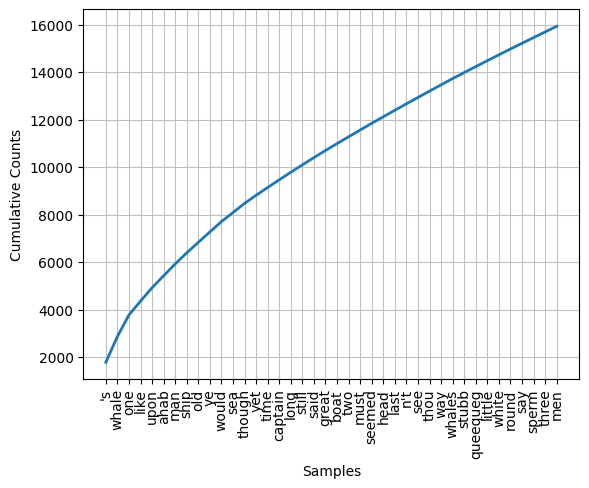

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

In [100]:
fq.plot(40, cumulative = True)

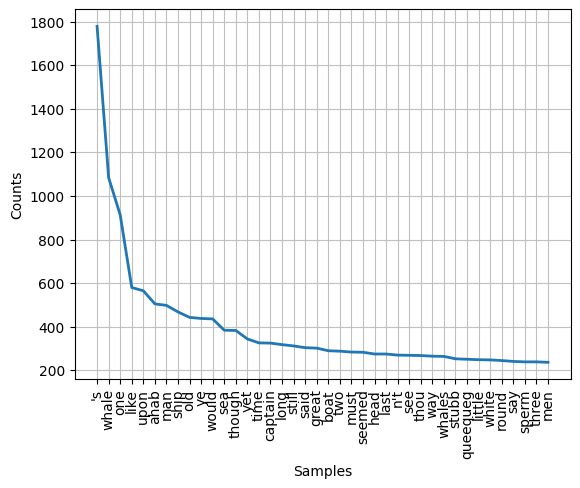

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

In [101]:
fq.plot(40)

Consider [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law): When the elements of a set - for example, the words of a text - are ordered by their frequency, the probability $p$ of their occurrence is inversely proportional to the place $n$ on the frequency list. 

In [124]:
logFreq = [np.log(i[1]) for i in fq.most_common(10000)]
logRank = [np.log(1 + i) for i in range(0,10000)]
logTheo = [np.log(1/(1 + i)) for i in range(0,10000)] + logFreq[0]

In [125]:
dff = pd.DataFrame({"x": logRank, "emp": logFreq, "theo": logTheo})
dff.head(4)

,x,emp,theo
0,0.000000,7.021084,7.021084
1,0.693147,6.899723,6.327937
2,1.098612,6.210600,5.922472
3,1.386294,6.115892,5.634790


In [126]:
dff = dff.melt("x")
dff.head(4)

,x,variable,value
0,0.000000,emp,7.021084
1,0.693147,emp,6.899723
2,1.098612,emp,6.210600
3,1.386294,emp,6.115892


In [127]:
import plotly.express as px

fig = px.line(dff, x="x", y="value", color="variable")
fig.show()

Does this change if we consider only, e.g., nouns? 

In [118]:
taggs = [a for tag in tags for (a, b) in tag if b[0] == 'N']

In [120]:
taggs[0]

'pale'

In [121]:
fq = nltk.FreqDist([a for tag in tags for (a, b) in tag if b[0] == 'N'])

In [122]:
fq.most_common(10)

[('i', 1120),
 ('whale', 992),
 ('man', 498),
 ('ship', 453),
 ('sea', 368),
 ('ahab', 333),
 ('time', 326),
 ('boat', 289),
 ('head', 270),
 ('way', 265)]

In [123]:
#tags

Lets go back to the small corpus. 

In [128]:
corpus

['The cat saw the dog was angry at the other cat.',
 'The dog saw the cat was angry at the other cat.',
 'The canary saw the iguana was sad.']

In [129]:
df

,the,cat,saw,dog,was,angry,at,other,.,canary,iguana,sad
0,3,2,1,1,1,1,1,1,1,0,0,0
1,3,2,1,1,1,1,1,1,1,0,0,0
2,2,0,1,0,1,0,0,0,1,1,1,1


Notice that when we use term frequencies as features, we lose information about the order of the words in each document. Also, absolute frequencies inflate non-meaning carrying words. 

The __scikit-learn__ package provides functions to help with feature engineering. The `sklearn.feature_extraction.text` submodule is specifically for extracting features from text documents.

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

In [131]:
vec = CountVectorizer(tokenizer = nltk.word_tokenize)
freq = vec.fit_transform(corpus)

In [132]:
freq

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [133]:
# .todense() convert sparse matrix to a dense matrix
# Don't do this for a really large matrix!
freq.todense()

matrix([[1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3, 1],
        [1, 1, 1, 0, 2, 1, 0, 1, 0, 1, 3, 1],
        [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 1]])

Use the `.get_feature_names_out()` method to see which term each column corresponds to:

In [134]:
vec.get_feature_names_out()

array(['.', 'angry', 'at', 'canary', 'cat', 'dog', 'iguana', 'other',
       'sad', 'saw', 'the', 'was'], dtype=object)

In [135]:
counts = pd.DataFrame(freq.todense(), columns = vec.get_feature_names_out())
counts

,.,angry,at,canary,cat,dog,iguana,other,sad,saw,the,was
0,1,1,1,0,2,1,0,1,0,1,3,1
1,1,1,1,0,2,1,0,1,0,1,3,1
2,1,0,0,1,0,0,1,0,1,1,2,1


In [136]:
vec

CountVectorizer(tokenizer=<function word_tokenize at 0x7ff5f1d418b0>)

One problem with term frequencies is that some terms have high frequencies simply because they appear frequently in the language. These terms can cause documents to appear similar even if they are otherwise different.

While removing stopwords takes care of some high-frequency words, there may also be high-frequency words that have meaning and need to be kept.

### One-hot Encoding

We can avoid emphasis on high-frequency words by ignoring frequency altogether. Instead, we can create indicator variables for individual words. The indicator is 1 if the word appears in the document, and 0 otherwise.

In machine learning, an indicator variable is also called a _one-hot encoding_.

The `sklearn.preprocessing` submodule of __scikit-learn__ provides a function for one-hot encoding.

In [137]:
from sklearn.preprocessing import Binarizer

In [138]:
freq

<3x12 sparse matrix of type '<class 'numpy.int64'>'
	with 25 stored elements in Compressed Sparse Row format>

In [139]:
(freq > 0).todense()

matrix([[ True,  True,  True, False,  True,  True, False,  True, False,
          True,  True,  True],
        [ True,  True,  True, False,  True,  True, False,  True, False,
          True,  True,  True],
        [ True, False, False,  True, False, False,  True, False,  True,
          True,  True,  True]])

In [140]:
binarizer = Binarizer()
ohot = binarizer.fit_transform(freq)
ohot.todense()

matrix([[1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
        [1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1],
        [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1]])

In [141]:
pd.DataFrame(ohot.todense(), columns = vec.get_feature_names_out())

,.,angry,at,canary,cat,dog,iguana,other,sad,saw,the,was
0,1,1,1,0,1,1,0,1,0,1,1,1
1,1,1,1,0,1,1,0,1,0,1,1,1
2,1,0,0,1,0,0,1,0,1,1,1,1


In [142]:
counts

,.,angry,at,canary,cat,dog,iguana,other,sad,saw,the,was
0,1,1,1,0,2,1,0,1,0,1,3,1
1,1,1,1,0,2,1,0,1,0,1,3,1
2,1,0,0,1,0,0,1,0,1,1,2,1


As with term frequencies, we lose information about the order of the words in the document.

One-hot encoding as an extreme transformation: every term is equally important. This means terms that are relatively rare or unique still might be underemphasized (this is also a problem for term frequencies).

### Term Frequency-Inverse Document Frequency

_Term frequency-inverse document frequency_ (tf-idf) statistics put terms on approximately the same scale while also emphasizing relatively rare terms. There are [several different tf-idf statistics](https://en.wikipedia.org/wiki/Tf%E2%80%93idf).

The _smoothed tf-idf_, for a term $t$ and document $d$, is given by:

$$
\operatorname{tf-idf}(t, d) = \operatorname{tf}(t, d) \cdot \log \left( \frac{N}{1 + n_t} \right)
$$

where $N$ is the total number of documents and $n_t$ is the number of documents that contain $t$.

The `sklearn.feature_extraction.text` submodule of __scikit-learn__ provides a function for computing tf-idf:

In [143]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vec = TfidfVectorizer(tokenizer = nltk.word_tokenize) 
tfidf = vec.fit_transform(corpus)

In [152]:
corpus

['The cat saw the dog was angry at the other cat.',
 'The dog saw the cat was angry at the other cat.',
 'The canary saw the iguana was sad.']

In [146]:
pd.DataFrame(tfidf.todense(), columns = vec.get_feature_names_out())

,.,angry,at,canary,cat,dog,iguana,other,sad,saw,the,was
0,0.198948,0.256182,0.256182,0.000000,0.512364,0.256182,0.000000,0.256182,0.000000,0.198948,0.596845,0.198948
1,0.198948,0.256182,0.256182,0.000000,0.512364,0.256182,0.000000,0.256182,0.000000,0.198948,0.596845,0.198948
2,0.253183,0.000000,0.000000,0.428676,0.000000,0.000000,0.428676,0.000000,0.428676,0.253183,0.506366,0.253183


In [151]:
a = tfidf[0,].todense()
a @ a.T

matrix([[1.]])

Note: After the calculation, the final TFIDF vector is normalized by the Euclidean norm!

In long documents or documents with many high-frequency terms, we can further reduce the emphasis on these terms by taking the logarithm of the term frequency. To do this, set `sublinear_tf = True` in the `TfidfVectorizer()` function.

## Measuring Similarity

We can measure the _similarity_ of two documents by computing the distance between their term frequency vectors. There are many different ways we can measure distance and similarity:

* Minkowski distance, a family of distances that includes Euclidean distance ($\ell_2$-norm) and Manhattan distance ($\ell_1$-norm). 
 * $\ell_2$-norm, $\|a - b \|_2 = \sqrt{\sum_{i=1}^n (a_i - b_i)^2}$
 * $\ell_1$-norm, $\|a -b\|_1 = \sum_{i=1}^n |a_i - b_i|$

* $\ell_\infty$-norm, $\|a-b\|_\infty = \max_{1\leq i\leq n} |a_i - b_i|$

    * Relation between those norms: $\|\cdot\|_1$ $\geq$ $\|\cdot\|_2$ $\geq$ $\cdots$ $\geq$ $\|\cdot\|_\infty$

* Mahalanobis distance, the Euclidean distance between z-scores.
* Cosine similarity, the cosine of the angle between two vectors. See [here](https://stats.stackexchange.com/a/235676/29695) for an explanation of how cosine similarity is related to correlation. Note that the range of cosine is $[-1, 1]$ and $\cos(0) = 1$, so vectors that are close together will have a cosine similarity close to 1, not 0.
* And others...

Cosine similarity often works well for language data. The cosine similarity between two vectors $a$ and $b$ is defined as:

$$
\frac{a'b}{\Vert a \Vert_2 \Vert b \Vert_2}.
$$

The `TfidfVectorizer()` function already divides the returned tf-idf vectors by their Euclidean norms, so we can compute cosine similarity as a simple dot product:

In [153]:
(tfidf @ tfidf.T).todense()

matrix([[1.        , 1.        , 0.45333284],
        [1.        , 1.        , 0.45333284],
        [0.45333284, 0.45333284, 1.        ]])

Part of the reason that cosine similarity is a good measure in NLP is that cosine similarity, like correlation, is not affected by the scale of the vector elements. For vectors that contain term frequencies (or functions of term frequencies), this means that the length of the original documents will not affect whether or not they are similar -- only their word content will.

## The Bag-of-words Model

The one-hot encoding, term frequencies, and TF-IDF scores all ignore word order.

The _bag-of-words model_ assumes that the order of words in a document doesn't matter. Imagine taking the words in each document and dumping them into a bag, where they get all mixed up. Note that in this case "model" means a way of thinking about a problem, not a statistical model.

While the order of words in a document might seem important, the bag-of-words model is surprisingly useful. The bag-of-words model is a good place to start if you want to use statistical methods on language data.

In [ ]:
mytokenizer = lambda x:  nltk.bigrams(nltk.word_tokenize(x))

In [156]:
[i for i in mytokenizer('Hi! I am Peter!')]

[('Hi', '!'), ('!', 'I'), ('I', 'am'), ('am', 'Peter'), ('Peter', '!')]

In [ ]:
vec = TfidfVectorizer(tokenizer = mytokenizer) 
tfidf = vec.fit_transform(corpus)

In [159]:
corpus

['The cat saw the dog was angry at the other cat.',
 'The dog saw the cat was angry at the other cat.',
 'The canary saw the iguana was sad.']

In [158]:
(tfidf @ tfidf.T).todense()

matrix([[1.        , 0.7133037 , 0.05241552],
        [0.7133037 , 1.        , 0.05241552],
        [0.05241552, 0.05241552, 1.        ]])

In [160]:
pd.DataFrame(tfidf.todense(), columns = vec.get_feature_names_out())

,"(angry, at)","(at, the)","(canary, saw)","(cat, .)","(cat, saw)","(cat, was)","(dog, saw)","(dog, was)","(iguana, was)","(other, cat)","(sad, .)","(saw, the)","(the, canary)","(the, cat)","(the, dog)","(the, iguana)","(the, other)","(was, angry)","(was, sad)"
0,0.287945,0.287945,0.000000,0.287945,0.378613,0.000000,0.000000,0.378613,0.000000,0.287945,0.000000,0.223615,0.000000,0.287945,0.287945,0.000000,0.287945,0.287945,0.000000
1,0.287945,0.287945,0.000000,0.287945,0.000000,0.378613,0.378613,0.000000,0.000000,0.287945,0.000000,0.223615,0.000000,0.287945,0.287945,0.000000,0.287945,0.287945,0.000000
2,0.000000,0.000000,0.396875,0.000000,0.000000,0.000000,0.000000,0.000000,0.396875,0.000000,0.396875,0.234400,0.396875,0.000000,0.000000,0.396875,0.000000,0.000000,0.396875
